In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

In [6]:
Pat = [5, 4, 4, 3, 9, 4]
Jack = [4, 8, 7, 5, 1, 5]
Alex = [9, 9, 8, 10, 4, 10]
combined_score = Pat + Jack + Alex
print('Combined_score is:',combined_score)

Combined_score is: [5, 4, 4, 3, 9, 4, 4, 8, 7, 5, 1, 5, 9, 9, 8, 10, 4, 10]


In [12]:
archer_names = ((['Pat'] * len(Pat)) + (['Jack'] * len(Jack)) + (['Alex'] * len(Alex)))
my_data = pd.DataFrame({'archer_names': archer_names, 'score': combined_score})
print(my_data)

   archer_names  score
0           Pat      5
1           Pat      4
2           Pat      4
3           Pat      3
4           Pat      9
5           Pat      4
6          Jack      4
7          Jack      8
8          Jack      7
9          Jack      5
10         Jack      1
11         Jack      5
12         Alex      9
13         Alex      9
14         Alex      8
15         Alex     10
16         Alex      4
17         Alex     10


In [13]:
print(my_data.groupby('archer_names').mean())

                 score
archer_names          
Alex          8.333333
Jack          5.000000
Pat           4.833333


In [15]:
linear_model = ols('score ~ archer_names', data=my_data).fit()
table = sm.stats.anova_lm(linear_model)
print(table)

                df     sum_sq    mean_sq         F    PR(>F)
archer_names   2.0  46.777778  23.388889  4.488273  0.029668
Residual      15.0  78.166667   5.211111       NaN       NaN


In [16]:
# p value(0,029) is < 0.05 significance. So, we reject Null hypothesis. All arches don't perform equally.

In [17]:
# Tukey's Method

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


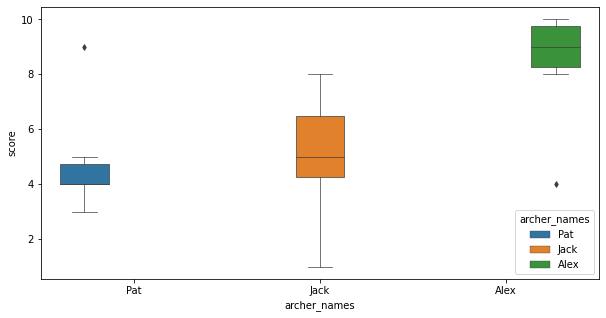

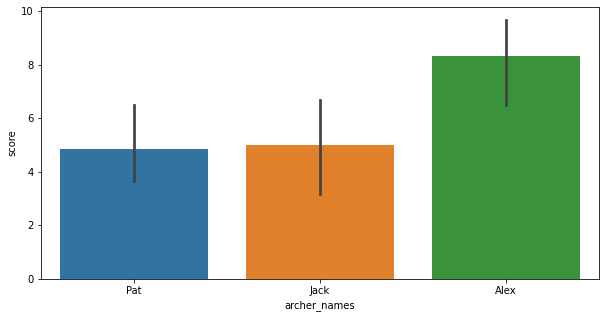

In [21]:
plt.figure(figsize= (10, 5))
print(sns.boxplot(x='archer_names', y='score', data=my_data, hue='archer_names', linewidth=0.7, fliersize=4))
plt.figure(figsize=(10, 5))
print(sns.barplot(x='archer_names', y='score', data=my_data))

In [22]:
multi_comparison = MultiComparison(my_data['score'], my_data['archer_names'])
multi_comparison_results = multi_comparison.tukeyhsd(alpha=0.05)
print(multi_comparison_results.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  Alex   Jack  -3.3333 0.0568 -6.7554 0.0887  False
  Alex    Pat     -3.5 0.0447  -6.922 -0.078   True
  Jack    Pat  -0.1667    0.9 -3.5887 3.2554  False
---------------------------------------------------


In [23]:
print(multi_comparison.groupsunique)

['Alex' 'Jack' 'Pat']


In [ ]:
#Alex is the best archer if we look at the meandiffcolumn.